## A/B tests с Python

### Урок 8. Python применение статистических критериев на практике - пайплайн оценки A/B

#### Задание: На сайте запущен А/В тест с целью увеличить доход. В приложенном excel файле вы найдете сырые данные по результатам эксперимента – user_id, тип выборки variant_name и доход принесенный пользователем revenue. Проанализируйте результаты эксперимента и напишите свои рекомендации менеджеру.

<a id="Libraries"></a>
##  Загрузка библиотек 

In [1]:
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')



In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Подготовка данных

In [3]:
data = pd.read_excel('/Users/alex7/Desktop/Lesson 3/Alex70_first/A_B tests/AB_Test_Results.xlsx')

data.head(10)

,USER_ID,VARIANT_NAME,REVENUE
0,737,variant,0.0
1,2423,control,0.0
2,9411,control,0.0
3,7311,control,0.0
4,6174,variant,0.0
5,2380,variant,0.0
6,2849,control,0.0
7,9168,control,0.0
8,6205,variant,0.0
9,7548,control,0.0


Анализируем типы данных, отражаемой информации.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   USER_ID       10000 non-null  int64  
 1   VARIANT_NAME  10000 non-null  object 
 2   REVENUE       10000 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 234.5+ KB


Количество строк и столбцов.

In [7]:
data.shape

(10000, 3)

Основные характеристики отображаемой по столбцам информации.

In [5]:
data.describe()

,USER_ID,REVENUE
count,10000.000000,10000.000000
mean,4981.080200,0.099447
std,2890.590115,2.318529
min,2.000000,0.000000
25%,2468.750000,0.000000
50%,4962.000000,0.000000
75%,7511.500000,0.000000
max,10000.000000,196.010000


Наличие пустых значений.

In [6]:
data.isna().sum()

USER_ID         0
VARIANT_NAME    0
REVENUE         0
dtype: int64

Количество пользователей в выборках.

In [7]:
data.VARIANT_NAME.value_counts()

VARIANT_NAME
variant    5016
control    4984
Name: count, dtype: int64

Общее количество пользователей, оформивших покупку.

In [8]:
data[data['REVENUE']>0]

,USER_ID,VARIANT_NAME,REVENUE
13,2529,variant,2.15
49,6429,control,3.25
139,3331,variant,4.27
149,8110,variant,1.75
152,8607,control,2.99
...,...,...,...
9651,9928,variant,1.25
9711,6468,control,2.93
9724,5205,control,14.17
9725,702,variant,2.92


Посмотрим на группы отдельно

In [9]:
data[data['VARIANT_NAME']=='variant'].describe()

,USER_ID,REVENUE
count,5016.000000,5016.000000
mean,4972.776914,0.070070
std,2876.320625,1.314802
min,3.000000,0.000000
25%,2476.500000,0.000000
50%,4958.500000,0.000000
75%,7415.250000,0.000000
max,10000.000000,58.630000


In [10]:
data[data['VARIANT_NAME']=='control'].describe()

,USER_ID,REVENUE
count,4984.000000,4984.000000
mean,4989.436798,0.129013
std,2905.145109,3.007524
min,2.000000,0.000000
25%,2466.000000,0.000000
50%,4964.500000,0.000000
75%,7576.250000,0.000000
max,10000.000000,196.010000


Максимальный чек в второй группе значительно больше, чем в первой.

## Проверка на нормальность распределения и применение статистических критериев

### Проверка Метрики всех пользователей

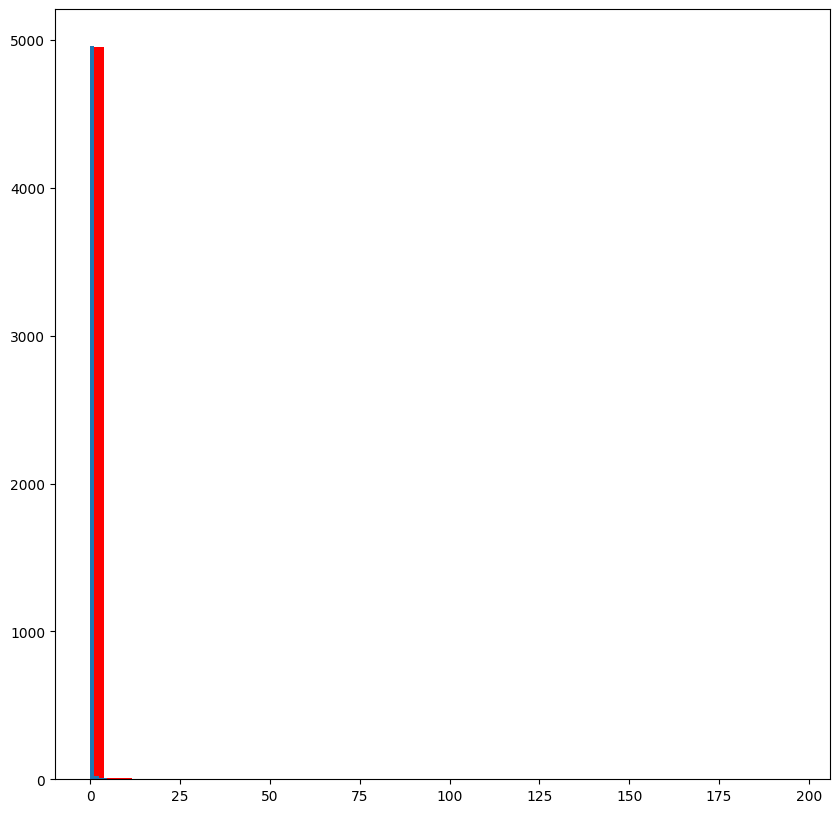

In [11]:
plt.figure(figsize=(10, 10))
control_visit_all = data['REVENUE'][data['VARIANT_NAME'] == 'control']
test_visit_all =data['REVENUE'][data['VARIANT_NAME'] == 'variant']


plt.hist(control_visit_all, color='r', bins=50)
plt.hist(test_visit_all,  bins=50)


plt.show()

In [12]:
stats.ttest_ind(control_visit_all, test_visit_all, equal_var = False)

Ttest_indResult(statistic=1.268403803110966, pvalue=0.20469713432410774)

### Метрика пользователей, оформивших покупку.

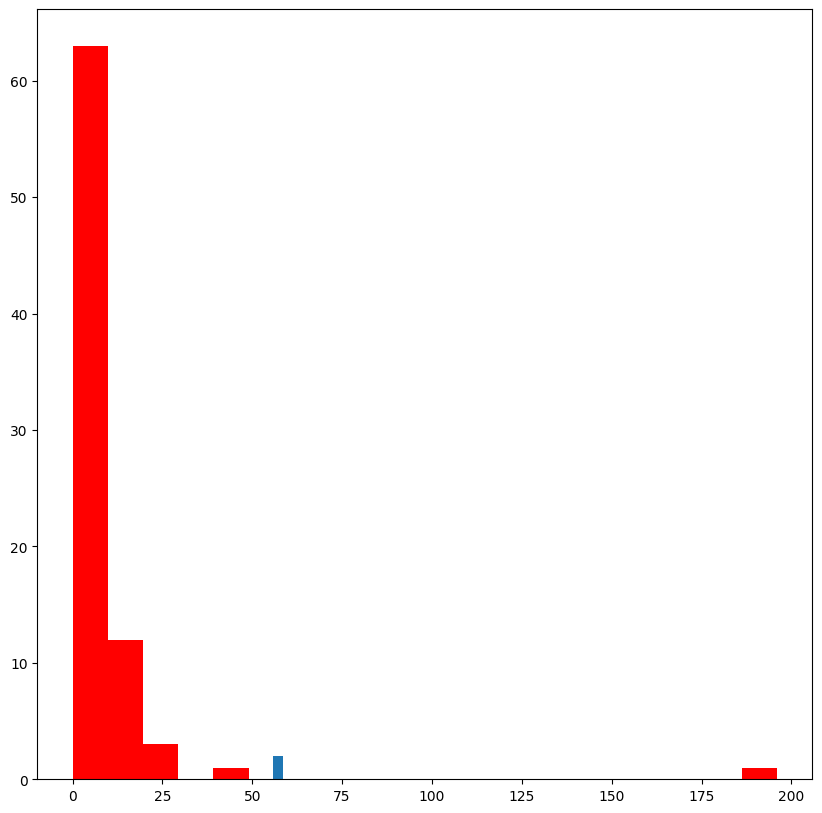

In [17]:
plt.figure(figsize=(10, 10))
control_visit = data['REVENUE'][(data['VARIANT_NAME'] == 'control')&(data['REVENUE'] > 0)]
test_visit =data['REVENUE'][(data['VARIANT_NAME'] == 'variant')&(data['REVENUE'] > 0)]
plt.hist(test_visit,  bins=20)
plt.hist(control_visit, color='r', bins=20)

plt.show()

In [18]:
stats.ttest_ind(control_visit, test_visit, equal_var = False)

Ttest_indResult(statistic=1.1379124979933528, pvalue=0.25760685398932337)

Результаты тестов показывают, что обе метрики имеют нормальное распределение, статистически значимых отличий в выборках не обнаружено (p_value > 5%).

## Количественные показатели значений выручки.

In [19]:
data['REVENUE'].value_counts()

REVENUE
0.00     9848
1.25       10
1.01        6
3.25        6
0.04        5
         ... 
2.19        1
2.14        1
17.08       1
2.00        1
2.92        1
Name: count, Length: 101, dtype: int64

In [20]:
k1 = data[data['VARIANT_NAME']=='control']['REVENUE'].sum()
k2 = data[data['VARIANT_NAME']=='variant']['REVENUE'].sum()

In [21]:
k1, k2

(643.0, 351.47)

In [22]:
n1 = data[data['VARIANT_NAME']=='control'].shape[0]
n2 = data[data['VARIANT_NAME']=='variant'].shape[0]

In [23]:
n1, n2

(4984, 5016)

In [24]:
from statsmodels.stats import proportion

z_score, z_pvalue = proportion.proportions_ztest(np.array([k1, k2]), 
                                                   np.array([n1, n2]))
print('Results are ','z_score =%.3f, pvalue = %.3f'%(z_score, z_pvalue))

Results are  z_score =9.848, pvalue = 0.000


In [25]:
if abs(z_pvalue) < 0.05:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We may reject the null hypothesis!


Результаты теста показывают наличие статистически значимых различий в пропорциональности выборок.

## Непараметрический Хи-квадрат

In [28]:
chisq, pvalue, table = proportion.proportions_chisquare(np.array([k1, k2]), 
                                                   np.array([n1, n2]))

print('Results are ','chisq =%.3f, pvalue = %.3f'%(chisq, pvalue))

Results are  chisq =96.984, pvalue = 0.000


In [29]:
if abs(pvalue) < 0.05:
    print("We may reject the null hypothesis!")
else:
    print("We have failed to reject the null hypothesis")

We may reject the null hypothesis!


Результаты теста показывают статистическую значимость качественных различий двух или нескольких относительных показателей. P-value существенно меньше 5%.

## Тестирование метрик arpu и arppu.


### Непараметрический критерий  Манн-Уитни

In [30]:
data.groupby('VARIANT_NAME')['REVENUE'].describe()

,count,mean,std,min,25%,50%,75%,max
VARIANT_NAME,,,,,,,,
control,4984.0,0.129013,3.007524,0.0,0.0,0.0,0.0,196.01
variant,5016.0,0.070070,1.314802,0.0,0.0,0.0,0.0,58.63


In [31]:
mw_stats = stats.mannwhitneyu(x=data[(data['VARIANT_NAME'] == 'control')&(data['REVENUE'] > 0)]['REVENUE'].values,
                                                  y=data[(data['VARIANT_NAME'] == 'variant')&(data['REVENUE'] > 0)]['REVENUE'].values)
mw_stats
#ARPPU

MannwhitneyuResult(statistic=3356.0, pvalue=0.07924299810603061)

In [32]:
mw_stats = stats.mannwhitneyu(x=data[(data['VARIANT_NAME'] == 'control')]['REVENUE'].values,
                                                  y=data[(data['VARIANT_NAME'] == 'variant')]['REVENUE'].values)
mw_stats
#ARPU

MannwhitneyuResult(statistic=12521564.0, pvalue=0.47825247965294926)

Результаты тестов показывают, что и в случае тестирования метрики arpu и arppu с помощью непараметрического критерия Манна-Уитни, статистически значимых отличий в выборках не обнаружено (p_value > 5%).

## Применяем метод Бутстрап для праверки влияния качества выборок.

Гипотезы:  
  
H0: Набор статистически значимо не влияет (p-value > 0.05)  
H1: Набор статистически значимо влияет (p-value < 0.05)  


In [36]:
import numpy as np
import pandas as pd
from scipy.stats import *
import matplotlib.pyplot as plt
from tqdm.auto import tqdm #для красивой полоски

plt.style.use('ggplot')

def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 500, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_2), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"p_value": p_value}

  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:00<00:00, 1382.25it/s]


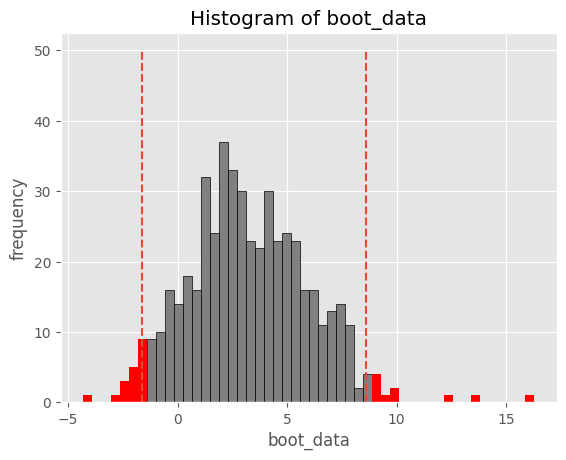

{'p_value': 0.240719727710335}

In [37]:
get_bootstrap(data[(data['VARIANT_NAME'] == 'control')&(data['REVENUE'] > 0)]['REVENUE'], data[(data['VARIANT_NAME'] == 'variant')&(data['REVENUE'] > 0)]['REVENUE'])

100%|██████████| 500/500 [00:00<00:00, 935.32it/s] 


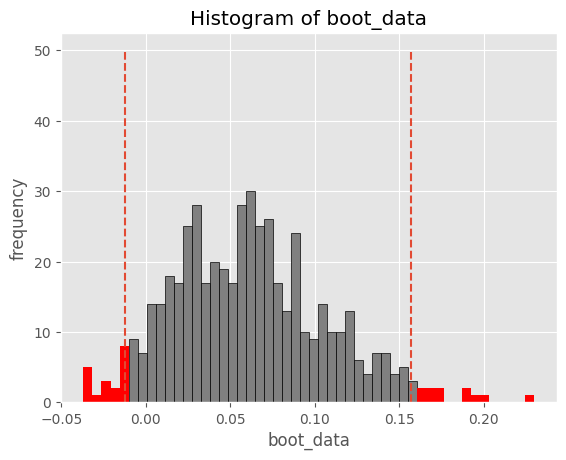

{'p_value': 0.1770847965759771}

In [38]:
get_bootstrap(data[(data['VARIANT_NAME'] == 'control')]['REVENUE'], data[(data['VARIANT_NAME'] == 'variant')]['REVENUE'])

И в случае тестирования выборки для всех пользователей и пользователей, оформивших покупку статистически значимых отличий в качестве выборок не обнаружено (p_value > 5%).